In [1]:
!pip install --upgrade tensorflow-estimato
!pip install tensorflow-text==2.7.3

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ERROR: Could not find a version that satisfies the requirement tensorflow-estimato (from versions: none)
ERROR: No matching distribution found for tensorflow-estimato
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
!pip install --upgrade tensorflow keras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
# use pandas numpy as usual
import tensorflow  as tf
import pandas as pd
import numpy as np
from deep_autoviml import deep_autoviml as deepauto
from tensorflow.python.ops.math_ops import reduce_prod

2022-01-30 18:36:35.341066: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-01-30 18:36:35.341170: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Ra
2022-01-30 18:36:35.341232: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Ra
2022-01-30 18:36:35.341478: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.86.0
2022-01-30 18:36:35.341579: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.86.0
2022-01-30 18:36:35.341602: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.86.0
2022-01-30 18:36:35.342025: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  A


Imported deep_auto_viml. version=0.0.77
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [4]:
tf.__version__
import keras
keras.__version__

'2.7.0'

In [5]:
datapath = ''
filename = 'energydata_complete.csv'
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
sep = ','


#target = ['target_1','target_2','target_3']
target = 'Appliances'

In [6]:
# load dataset
train = pd.read_csv(filename, header=0, sep=sep)
print(train.shape)
train = train.dropna()
train.to_csv("/home/adarsh/Desktop/OpenWorld/deep_AutoViML/dataset/energydata_complete.csv")
filename = "/home/adarsh/Desktop/OpenWorld/deep_AutoViML/dataset/energydata_complete.csv"
train_datafile = datapath+filename

(19735, 29)


In [7]:

url = datapath + filename
test = pd.read_csv(url, header=0, sep=sep)
print(train.shape, test.shape)
test = test.dropna()
test

(19735, 29) (19735, 30)


,Unnamed: 0,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


<AxesSubplot:xlabel='date'>

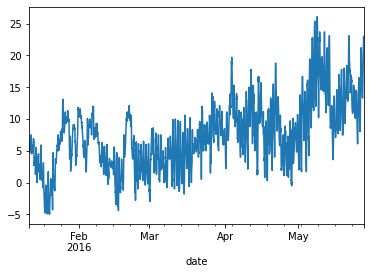

In [8]:
train['date'] = pd.to_datetime(train['date'],infer_datetime_format= True)
test['date'] = pd.to_datetime(test['date'],infer_datetime_format= True)

train.set_index('date')['T_out'].plot()

In [9]:
keras_model_type = "time series" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "energydata_complete"
model_options = {'features':['Appliances','T_out','RH_1','Visibility'], 'length':720, 'batch_size':16, 'sampling_rate':1,'stride':64, 'test_size':0.2, 'prebuilt-model':'lstm'}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'adam', 'epochs':1, 'batch_size':128, 'learning_rate':1}

In [10]:
model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		 keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='lstm', verbose=1)

Only CPU found on this device
Setting CPU strategy using 1 devices

Model and logs being saved in deep_autoviml/time series/model_2022_01_30-18_36_45
['Appliances', 'T_out', 'RH_1', 'Visibility'], features will be considered
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_13 (Dropout)        (None, 720, 128)          0         
                           

In [11]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
#from autoviml.Auto_ViML import plot_regression_scatters

In [12]:
predictions = deepauto.predict(model, project_name, test_dataset=url,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7efd5d481220> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7efd5d481220> model provided as input...
Time taken to load saved model = 0 seconds
[0.566 0.541 0.531 ... 0.539 0.549 0.539]
(19735,)
Boolean cols=False not converted to strings
    Boolean columns successfully converted to Integers
        Error in converting Boolean columns to Integers. Continuing...
Possible Conflict: Boolean columns in train and test data were passed differently. Check your test data types.
    number of steps needed to predict: 1
(19015, 1)
(19015, 3)
(19015, 4)
Appliances    19015
T_out         19015
RH_1          19015
Visibility    19015
dtype: int64
(19015, 4)
Converting model predictions into classes or other forms is erroring. Convert it yourself.


In [15]:
predictions

,Appliances,T_out,RH_1,Visibility,Appliances_pred
720,80,1.600000,38.260000,40.000000,143.602037
721,150,1.750000,38.126667,40.000000,144.060068
722,380,1.900000,38.230000,40.000000,143.588652
723,290,2.050000,38.430000,40.000000,142.401173
724,270,2.200000,38.560000,40.000000,140.692141
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,102.557396
19731,90,22.600000,46.500000,24.500000,102.916843
19732,270,22.466667,46.596667,25.333333,103.335299
19733,420,22.333333,46.990000,26.166667,103.858916


<AxesSubplot:>

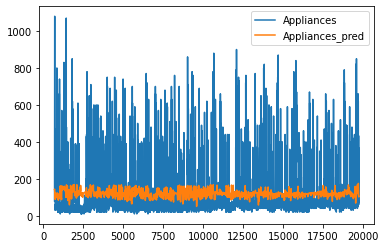

In [16]:
predictions[['Appliances','Appliances_pred']].plot()